
# Copernicus Marine Client (CMEMS)

This example runs an OceanDrift simulation with current data from CMEMS.
To run this example, you need a CMEMS account created at https://marine.copernicus.eu
with username and password stored as environment variables
``COPERNICUSMARINE_SERVICE_USERNAME`` and ``COPERNICUSMARINE_SERVICE_PASSWORD``
or in a ``.netrc`` file with contents::

    machine copernicusmarine login <your username> password <your password>

This file must be stored in your home folder (and unreadable by others) or in the main OpenDrift folder

Alternatively, an Xarray dataset can be created explicitly with the copernicusmarine client, and provided to reader_netCDF_CF_generic:
https://opendrift.github.io/gallery/example_long_cmems_currents.html


13:37:46 INFO    opendrift:509: OpenDriftSimulation initialised (version 1.14.2)
13:37:46 WARNING py.warnings:112: /tmp/ipykernel_1415/771961690.py:14: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  o.seed_elements(lon=lon, lat=lat, number=50, radius=1000, time=datetime.utcnow())

13:37:46 INFO    opendrift.models.basemodel.environment:206: Adding a global landmask from GSHHG
13:37:50 INFO    opendrift.models.basemodel.environment:229: Fallback values will be used for the following variables which have no readers: 
13:37:50 INFO    opendrift.models.basemodel.environment:232: 	x_sea_water_velocity: 0.000000
13:37:50 INFO    opendrift.models.basemodel.environment:232: 	y_sea_water_velocity: 0.000000
13:37:50 INFO    opendrift.models.basemodel.environment:232: 	sea_surface_height: 0.000000
13:37:50 INFO    opendrift.models.basemodel.

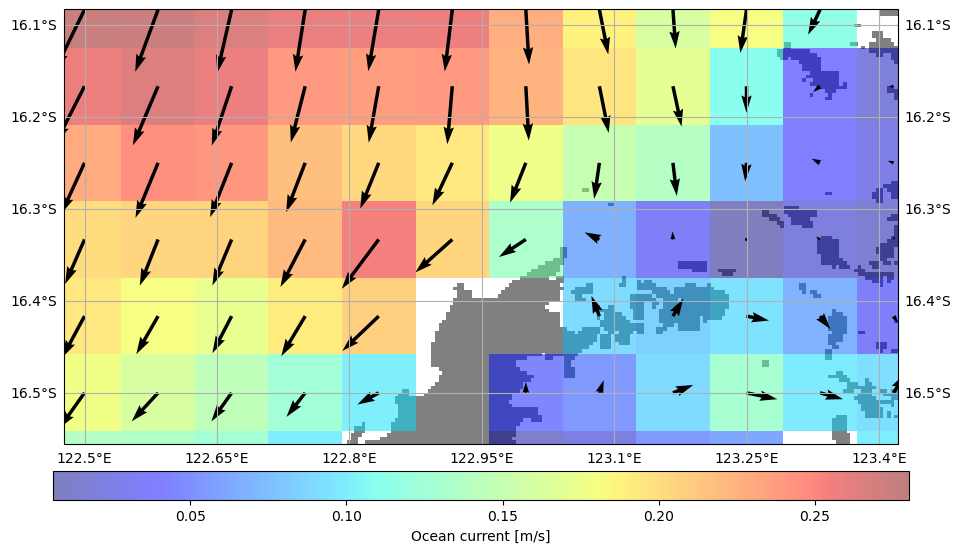

13:37:58 WARNING py.warnings:112: /opt/conda/lib/python3.12/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(

13:37:58 INFO    opendrift:3086: Time to make animation: 0:00:01.430748


In [1]:
from datetime import datetime, timedelta
from opendrift.models.oceandrift import OceanDrift

#lon = 4.8; lat = 60  # Bergen, Norway
#lon = -89; lat = 29.8  # New Orleans
#lon = 107; lat = 10  # Ho Chi Minh
lon = 123; lat = -16.3  # Australia


o = OceanDrift(loglevel=20)

o.add_readers_from_list(['cmems_mod_glo_phy_anfc_merged-uv_PT1H-i'])

o.seed_elements(lon=lon, lat=lat, number=50, radius=1000, time=datetime.utcnow())
o.run(duration=timedelta(days=1))

o.animation(fast=True, clabel='Ocean current [m/s]',
            background=['x_sea_water_velocity', 'y_sea_water_velocity'])